![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Exercises
## Bike store sales

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

import matplotlib.pyplot as plt

%matplotlib inline

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-white')
pd.set_option('precision', 0)


In [2]:
sales = pd.read_csv('data/sales_data.csv', parse_dates=['Date'])

In [3]:
sales.shape

(113036, 18)

In [4]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [5]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036,113036,113036,113036,113036,113036,113036,113036,113036
mean,16,2014,36,12,267,453,285,469,754
std,9,1,11,10,550,922,454,885,1309
min,1,2011,17,1,1,2,-30,1,2
25%,8,2013,28,2,2,5,29,28,63
50%,16,2014,35,10,9,24,101,108,223
75%,23,2016,43,20,42,70,358,432,800
max,31,2016,87,32,2171,3578,15096,42978,58074


Average Customer Age: 36


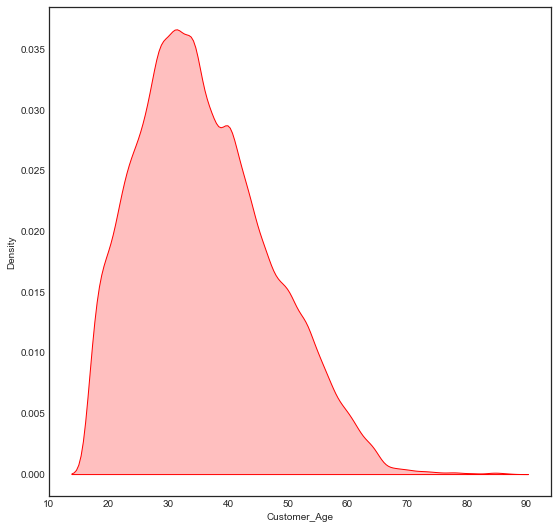

In [6]:
"""Average age of customer is 36."""

print('Average Customer Age:',format(sales['Customer_Age'].mean(), '.0f'))

with sns.axes_style('white'):
    plt.figure(figsize=(9,9))
    ax = sns.kdeplot(sales['Customer_Age'], shade=True, color="r")
    


In [7]:
iqr = np.percentile(sales['Customer_Age'],75) - np.percentile(sales['Customer_Age'],25)
print(' 25th Percentile: ',np.percentile(sales['Customer_Age'],25),'\n',
      '50th Percentile: ',np.percentile(sales['Customer_Age'],50),'\n',
      '75th Percentile: ',(np.percentile(sales['Customer_Age'],75)),'\n',
      '99th Percentile: ',np.percentile(sales['Customer_Age'],99),'\n',
      'IQR:',iqr)


 25th Percentile:  28.0 
 50th Percentile:  35.0 
 75th Percentile:  43.0 
 99th Percentile:  63.0 
 IQR: 15.0


35.0


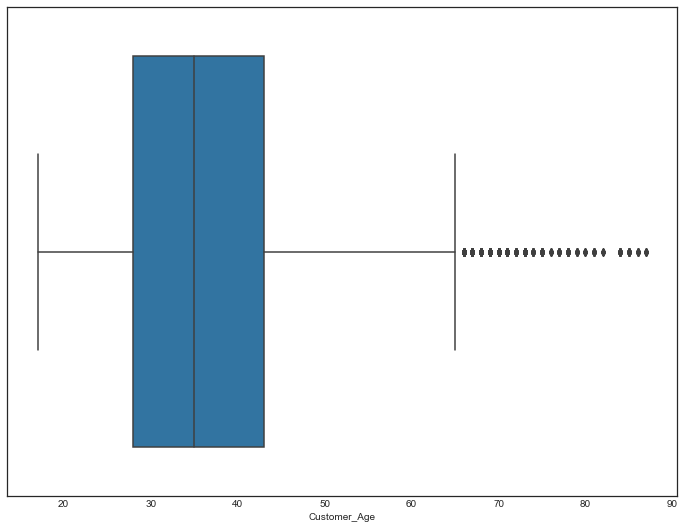

In [8]:
print(sales['Customer_Age'].median())

with sns.axes_style('white'):
    plt.figure(figsize=(12,9))
    ax = sns.boxplot(x=sales["Customer_Age"])




In [9]:
sales['pct_rank'] = sales['Customer_Age'].rank(pct=True)

In [10]:
sales.loc[sales['pct_rank'] > .5]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,pct_rank
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,9e-01
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,9e-01
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,8e-01
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522,8e-01
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379,8e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113029,2015-12-28,28,December,2015,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",2,24,64,75,48,123,7e-01
113030,2014-04-12,12,April,2014,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",6,24,64,225,144,369,7e-01
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184,7e-01
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260,6e-01


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Order_Quantity`?

In [11]:
sales['Order_Quantity'].mean()

11.901659648253654

Go ahead and show a <b>histogram</b> and a <b>box plot</b> with the `Order_Quantity` data:

<Figure size 648x648 with 0 Axes>

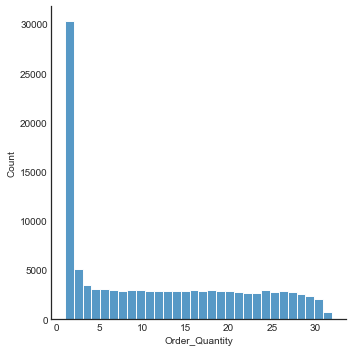

In [12]:
with sns.axes_style('white'):
    plt.figure(figsize=(9,9))
    ax = sns.displot(sales['Order_Quantity'],bins=30)

10.0


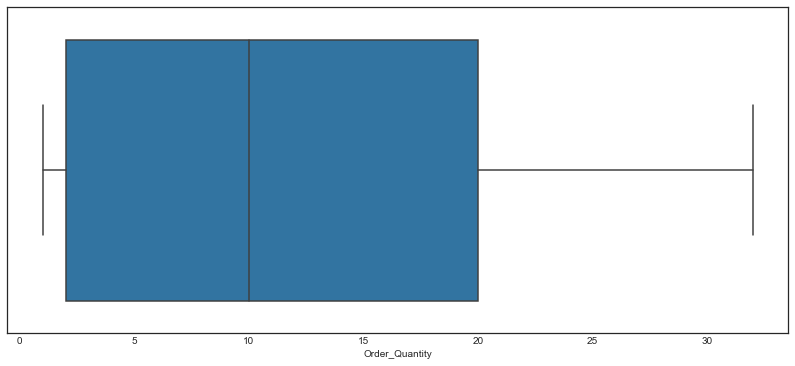

In [13]:
print(sales["Order_Quantity"].median())

with sns.axes_style('white'):
    plt.figure(figsize=(14,6))
    ax = sns.boxplot(x=sales["Order_Quantity"])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales per year do we have?

In [14]:
df_year = sales[['Year','Order_Quantity']].groupby('Year').count()

Go ahead and show a <b>pie plot</b> with the previous data:

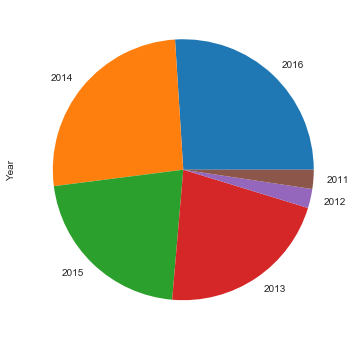

In [15]:
sales['Year'].value_counts().plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales per month do we have?

In [16]:
monthly_sales = sales[['Month','Order_Quantity']].groupby(['Month']).count()
monthly_sales

,Order_Quantity
Month,
April,10182
August,8200
December,11200
February,9022
January,9284
July,7462
June,11234
March,9674
May,11128


In [17]:
sales['Month'].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

Go ahead and show a <b>bar plot</b> with the previous data:

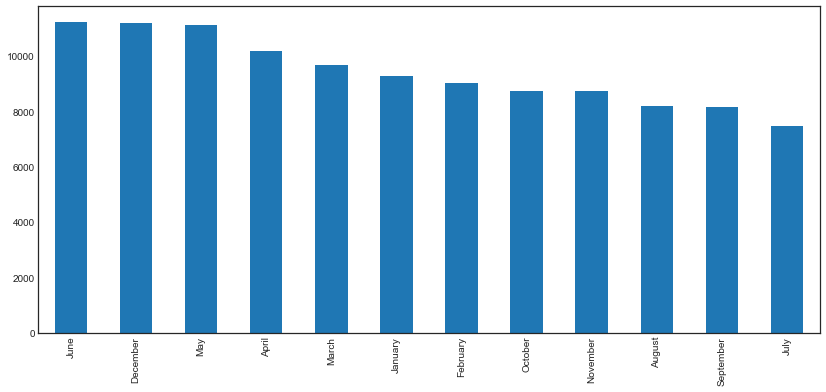

In [18]:
sales['Month'].value_counts().plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which country has the most sales `quantity of sales`?

In [19]:
"This code keeps the Object as a Pandas DataFrame"

sales[['Country','Order_Quantity']].groupby(['Country']).count()\
.sort_values(by='Order_Quantity', ascending=False).head(1)

,Order_Quantity
Country,
United States,39206


In [20]:
"This code allows the value_counts to be a Series and is cleaner"
sales['Country'].value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

Go ahead and show a <b>bar plot</b> of the sales per country:

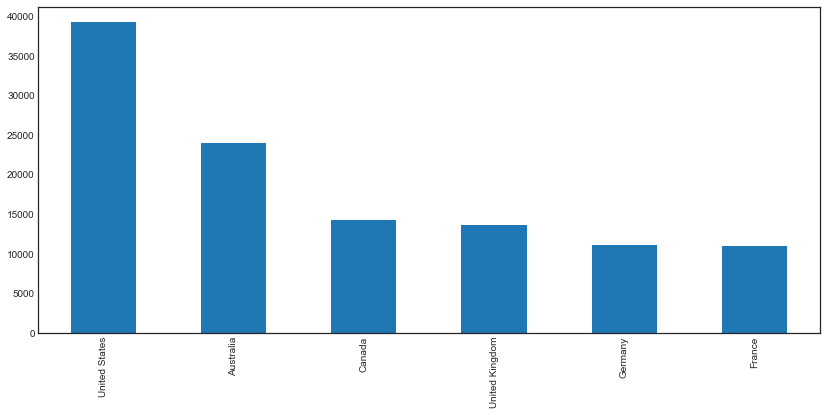

In [21]:
sales['Country'].value_counts().plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create a list of every product sold

In [22]:
# your code goes here
sorted(list(sales['Product'].unique()))

['AWC Logo Cap',
 'All-Purpose Bike Stand',
 'Bike Wash - Dissolver',
 'Classic Vest, L',
 'Classic Vest, M',
 'Classic Vest, S',
 'Fender Set - Mountain',
 'HL Mountain Tire',
 'HL Road Tire',
 'Half-Finger Gloves, L',
 'Half-Finger Gloves, M',
 'Half-Finger Gloves, S',
 'Hitch Rack - 4-Bike',
 'Hydration Pack - 70 oz.',
 'LL Mountain Tire',
 'LL Road Tire',
 'Long-Sleeve Logo Jersey, L',
 'Long-Sleeve Logo Jersey, M',
 'Long-Sleeve Logo Jersey, S',
 'Long-Sleeve Logo Jersey, XL',
 'ML Mountain Tire',
 'ML Road Tire',
 'Mountain Bottle Cage',
 'Mountain Tire Tube',
 'Mountain-100 Black, 38',
 'Mountain-100 Black, 42',
 'Mountain-100 Black, 44',
 'Mountain-100 Black, 48',
 'Mountain-100 Silver, 38',
 'Mountain-100 Silver, 42',
 'Mountain-100 Silver, 44',
 'Mountain-100 Silver, 48',
 'Mountain-200 Black, 38',
 'Mountain-200 Black, 42',
 'Mountain-200 Black, 46',
 'Mountain-200 Silver, 38',
 'Mountain-200 Silver, 42',
 'Mountain-200 Silver, 46',
 'Mountain-400-W Silver, 38',
 'Mountain-4

Create a **bar plot** showing the 10 most sold products (best sellers):

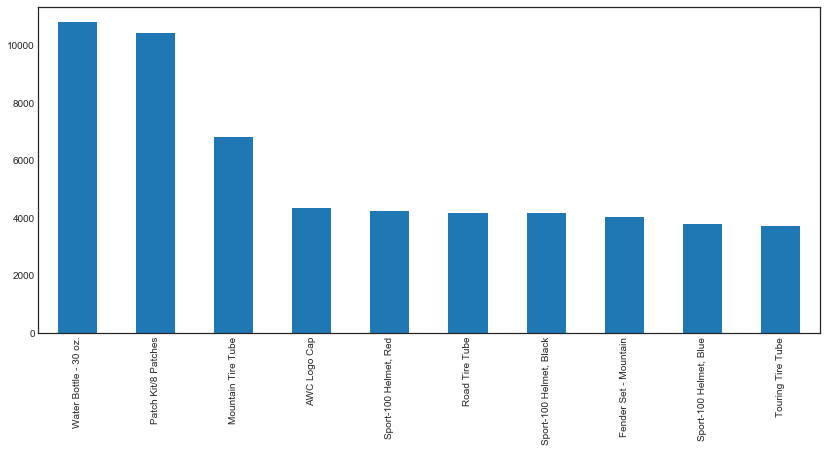

In [23]:
sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Unit_Cost` and `Unit_Price`?

Show a <b>scatter plot</b> between both columns.

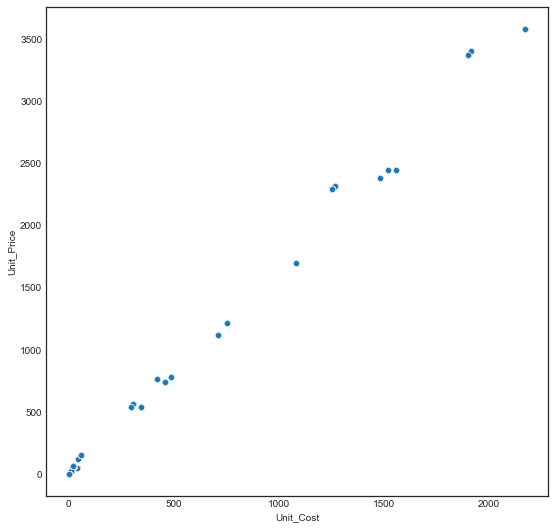

In [24]:
with sns.axes_style('white'):
    plt.figure(figsize=(9,9))
    ax = sns.scatterplot(data=sales, x="Unit_Cost", y="Unit_Price")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Order_Quantity` and `Profit`?

Show a <b>scatter plot</b> between both columns.

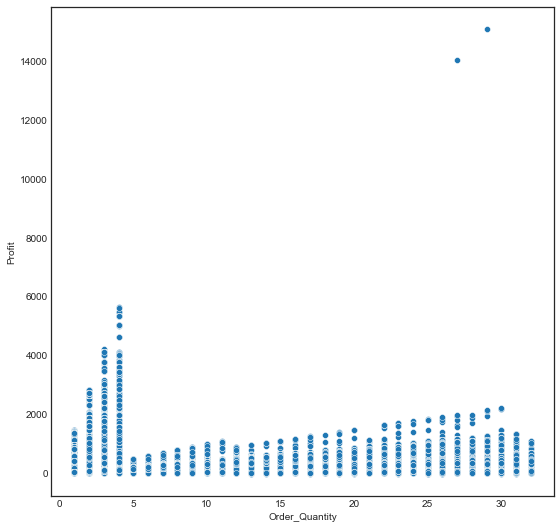

In [25]:
with sns.axes_style('white'):
    plt.figure(figsize=(9,9))
    ax = sns.scatterplot(data=sales, x="Order_Quantity", y="Profit")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Profit` per `Country`?

Show a grouped <b>box plot</b> per country with the profit values.

In [26]:
# your code goes here


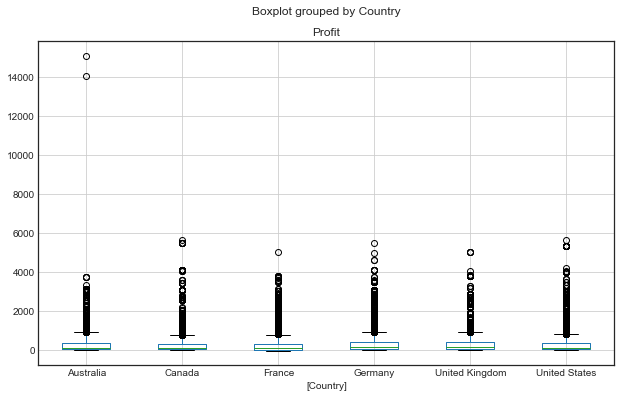

In [27]:
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between the `Customer_Age` per `Country`?

Show a grouped <b>box plot</b> per country with the customer age values.

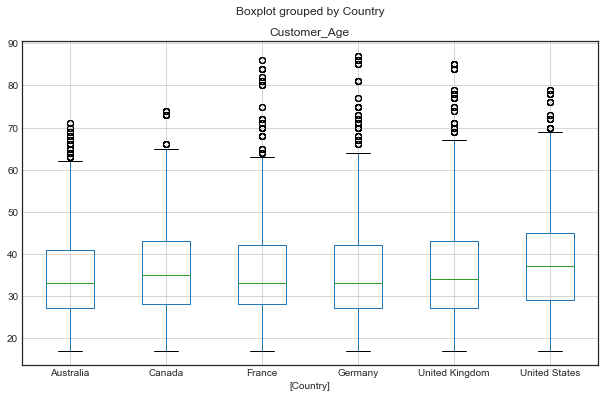

In [28]:
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `Calculated_Date` column

Use `Day`, `Month`, `Year` to create a `Date` column (`YYYY-MM-DD`).

In [29]:
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']]\
.apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)

sales['Calculated_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Parse your `Calculated_Date` column into a datetime object

In [30]:
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])
sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How did sales evolve through the years?

Show a <b>line plot</b> using `Calculated_Date` column as the x-axis and the count of sales as the y-axis.

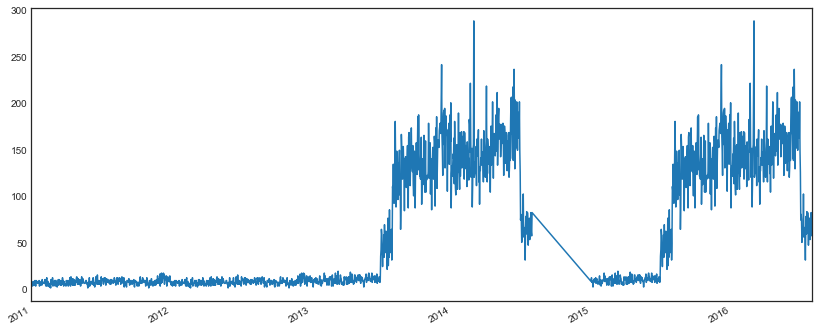

In [31]:
sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(14,6))

In [32]:
sales['Revenue']
sales['Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Revenue, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Increase 50 U$S revenue to every sale

In [33]:
# sales['Revenue'] = sales['Revenue'] + 50

sales['Revenue'] += 50

sales['Revenue'].head()

0    1000
1    1000
2    2451
3    2138
4     468
Name: Revenue, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in `Canada` or `France`?

In [34]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

25176

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many `Bike Racks` orders were made from Canada?

In [41]:
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

104

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in each region (state) of France?

In [51]:
france_states = sales.loc[(sales['Country']) == 'France', 'State'].value_counts()

france_states


Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

In [ ]:
# france_states = sales.loc[sales['Country'] == 'France', 'State'].value_counts()

# france_states

Go ahead and show a <b>bar plot</b> with the results:

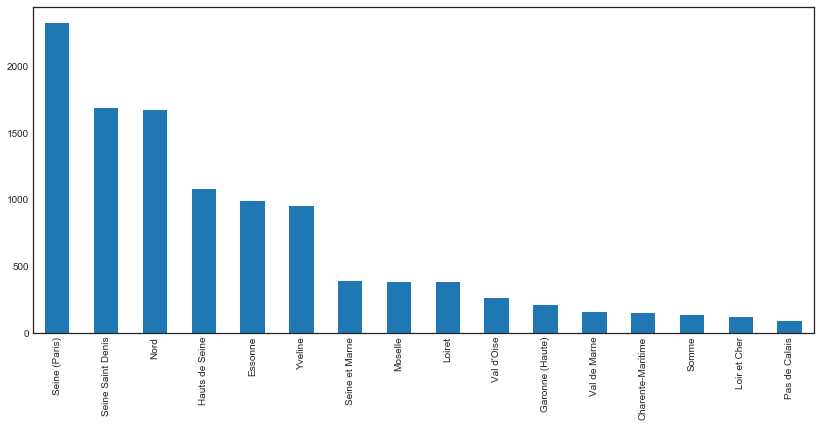

In [52]:
france_states.plot(kind='bar', figsize=(14,6))


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales were made per category?

In [68]:
sales['Product_Category'].groupby(sales["Product_Category"]).count()


Product_Category
Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

In [57]:
sales['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

Go ahead and show a <b>pie plot</b> with the results:

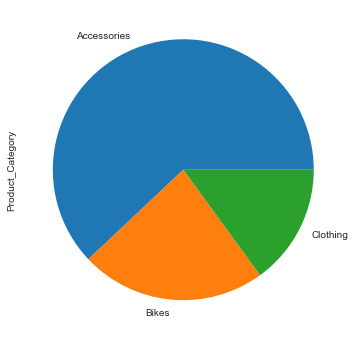

In [69]:
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per accessory sub-categories?

In [75]:
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()

accessories

Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

In [ ]:
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()

accessories

Go ahead and show a <b>bar plot</b> with the results:

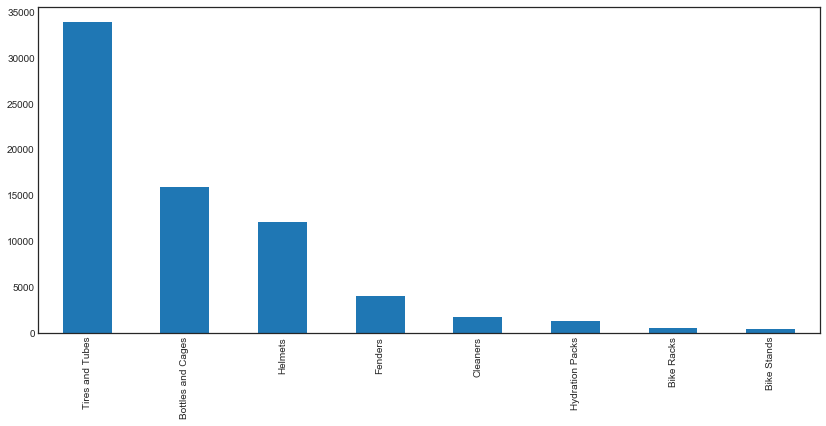

In [77]:
accessories.plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per bike sub-categories?

In [79]:
bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()

bikes

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

Go ahead and show a <b>pie plot</b> with the results:

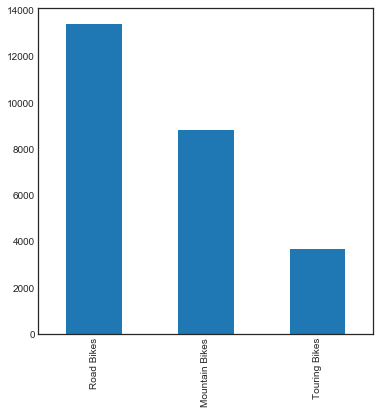

In [81]:
bikes.plot(kind='bar', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which gender has the most amount of sales?

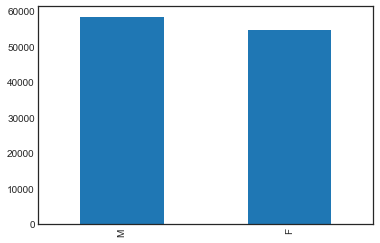

In [85]:
sales['Customer_Gender'].value_counts().plot(kind='bar')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales with exactly 500 in `Revenue` were made by men?

In [104]:
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] == 500)]




,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,pct_rank,Calculated_Date
30849,2015-10-10,10,October,2015,42,Adults (35-64),M,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Black",13,13,35,281,169,500,7e-01,2015-10-10
30943,2015-11-03,3,November,2015,44,Adults (35-64),M,Germany,Bayern,Accessories,Helmets,"Sport-100 Helmet, Blue",13,13,35,281,169,500,8e-01,2015-11-03
31527,2015-11-21,21,November,2015,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Red",13,13,35,281,169,500,3e-01,2015-11-21
31648,2014-01-04,4,January,2014,64,Adults (35-64),M,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Red",13,13,35,281,169,500,1e+00,2014-01-04
32521,2016-04-30,30,April,2016,40,Adults (35-64),M,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Blue",13,13,35,281,169,500,7e-01,2016-04-30
33614,2014-05-14,14,May,2014,23,Youth (<25),M,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Red",13,13,35,281,169,500,1e-01,2014-05-14
33733,2016-03-20,20,March,2016,51,Adults (35-64),M,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Black",13,13,35,281,169,500,9e-01,2016-03-20
34317,2016-05-05,5,May,2016,55,Adults (35-64),M,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Blue",13,13,35,281,169,500,9e-01,2016-05-05
34397,2015-09-22,22,September,2015,17,Youth (<25),M,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Black",13,13,35,281,169,500,6e-03,2015-09-22
34483,2015-12-07,7,December,2015,33,Young Adults (25-34),M,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Blue",13,13,35,281,169,500,4e-01,2015-12-07


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the top-5 sales with the highest revenue

In [108]:
sales.sort_values(['Revenue'], ascending=False).head(5)


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,pct_rank,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,9e-01,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54119,9e-01,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14362,9e-02,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,8e-01,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,4e-02,2011-09-30


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the sale with the highest revenue

In [111]:
sales.sort_values(['Revenue'], ascending=False).nlargest(1,'Revenue')

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,pct_rank,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,9e-01,2015-07-24


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with more than 10K in revenue?

In [118]:
tenK_sales = sales['Revenue'] > 10000

sales.loc[tenK_sales,'Order_Quantity'].mean()

3.689265536723164

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with less than 10K in revenue?

In [139]:
min_sale = sales['Revenue'] < 10000

sales.loc[(sales['Revenue'] < 10000), 'Order_Quantity'].mean()

11.914539380997528

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in May of 2016?

In [157]:
sales.loc[(sales['Year'] == 2016) & (sales['Month'] == 'May')].shape[0]


5015

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made between May and July of 2016?

In [159]:
sales.loc[(sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))].shape[0]


12164

In [160]:
cond = (sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))

sales.loc[cond].shape[0]

12164

Show a grouped <b>box plot</b> per month with the profit values.

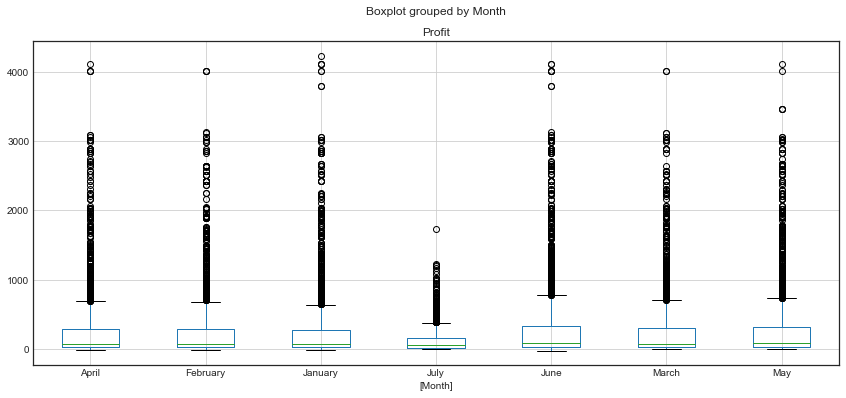

In [161]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]

profit_2016.boxplot(by='Month', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add 7.2% TAX on every sale `Unit_Price` within United States

In [164]:
#sales.loc[sales['Country'] == 'United States', 'Unit_Price'] = sales.loc[sales['Country'] == 'United States', 'Unit_Price'] * 1.072

sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)